In [1]:
import numpy as np
from siphon.catalog import TDSCatalog
import xarray as xr
# from xarray.backends import NetCDF4DataStore
# import netCDF4 as nc
import matplotlib.pylab as plt
import pandas as pd
import glob as glob

import datetime as datetime

In [2]:
path= glob.glob('/homes/metogra/iufarias/Alkenone_SST/data_processed/sst*');path.sort()

# SST_total=np.zeros([12*len(path),168,132])*np.nan
SST_total=xr.DataArray(coords=(range(len(path)*12),range(168),range(132)),
                       dims=['time','lat','lon'])

lon=xr.open_dataarray('/homes/metogra/iufarias/Alkenone_SST/data_processed/daily/sst_total_year_2020')['lon']
lat=xr.open_dataarray('/homes/metogra/iufarias/Alkenone_SST/data_processed/daily/sst_total_year_2020')['lat']



ini=0
for idd in range(len(path)):
    varx=xr.open_dataarray(path[idd])
    SST_total[ini:ini+12,:,:]=varx.data
    ini+=12

In [3]:
dates=pd.DatetimeIndex(np.arange(np.datetime64('1982-01'),np.datetime64('2020-01')))

In [4]:
SST_total['time']=dates
SST_total['lon']=lon
SST_total['lat']=lat

In [5]:
SST_total

<xarray.DataArray (time: 456, lat: 168, lon: 132)>
array([[[         nan,          nan,          nan, ..., 288.02895802,
         288.70482346, 288.70482346],
        [         nan,          nan,          nan, ..., 288.21137211,
         288.06240634, 288.80137055],
        [         nan,          nan,          nan, ..., 288.65068212,
         289.04309398, 289.0434423 ],
        ...,
        [287.60895828, 288.13206429, 288.32861433, ..., 290.03927939,
         289.68447455, 289.52535248],
        [287.68723376, 287.68723376, 288.25447451, ..., 289.86171433,
         289.86171433, 289.33723713],
        [287.79102825, 288.19344146, 287.93964675, ..., 289.52137178,
         289.02102661, 289.3899936 ]],

       [[         nan,          nan,          nan, ..., 285.51230093,
         286.34114779, 286.34114779],
        [         nan,          nan,          nan, ..., 285.09147814,
         285.46110817, 286.58268503],
        [         nan,          nan,          nan, ..., 285.03517546,
         285.06295324, 285.72851449],
...
        [282.25499166, 282.11499329, 281.91999308, ..., 285.94966024,
         286.85132548, 286.59599406],
        [282.86865845, 282.86865845, 282.91832479, ..., 286.43366191,
         286.43366191, 286.19632772],
        [283.23065999, 283.19266154, 282.82532654, ..., 285.71832682,
         285.95065816, 286.77899068]],

       [[         nan,          nan,          nan, ..., 285.04902501,
         285.95257273, 285.95257273],
        [         nan,          nan,          nan, ..., 285.3493485 ,
         285.49902541, 285.77644397],
        [         nan,          nan,          nan, ..., 286.02708976,
         285.58299154, 285.89332784],
        ...,
        [286.80870204, 286.32483107, 286.28257407, ..., 287.54063957,
         287.58676541, 287.31225192],
        [287.06160515, 287.06160515, 286.79095853, ..., 287.51612116,
         287.51612116, 286.92773241],
        [287.1796688 , 287.15193029, 287.24450979, ..., 287.14999193,
         286.9570913 , 287.05741242]]])
Coordinates:
  * time     (time) datetime64[ns] 1982-01-01 1982-02-01 ... 2019-12-01
  * lat      (lat) float32 -27.02 -27.06 -27.1 -27.15 ... -33.9 -33.94 -33.98
  * lon      (lon) float32 -52.98 -52.94 -52.9 -52.85 ... -47.6 -47.56 -47.52

In [6]:
sst_new=SST_total.where(SST_total-273<30,np.nan)


In [7]:
sst_new.lon

<xarray.DataArray 'lon' (lon: 132)>
array([-52.97912 , -52.93745 , -52.895782, -52.85412 , -52.81245 , -52.770786,
       -52.72912 , -52.68745 , -52.645786, -52.60412 , -52.56245 , -52.520786,
       -52.47912 , -52.43745 , -52.395786, -52.35412 , -52.31245 , -52.270786,
       -52.22912 , -52.18745 , -52.145786, -52.10412 , -52.06245 , -52.020786,
       -51.97912 , -51.93745 , -51.895786, -51.85412 , -51.81245 , -51.770786,
       -51.72912 , -51.68745 , -51.645786, -51.60412 , -51.56245 , -51.520786,
       -51.47912 , -51.437454, -51.395786, -51.35412 , -51.312454, -51.270786,
       -51.22912 , -51.187454, -51.145786, -51.10412 , -51.062454, -51.020786,
       -50.97912 , -50.937454, -50.895786, -50.85412 , -50.812454, -50.770786,
       -50.72912 , -50.687454, -50.645786, -50.60412 , -50.562454, -50.520786,
       -50.47912 , -50.437454, -50.395786, -50.35412 , -50.312454, -50.270786,
       -50.22912 , -50.187454, -50.145786, -50.104122, -50.062454, -50.020786,
       -49.979122, -49.937454, -49.895786, -49.854122, -49.812454, -49.770786,
       -49.729122, -49.687454, -49.645786, -49.604122, -49.562454, -49.520786,
       -49.479122, -49.437454, -49.395786, -49.354122, -49.312454, -49.270786,
       -49.229122, -49.187454, -49.145786, -49.104122, -49.062454, -49.020786,
       -48.979122, -48.937454, -48.895786, -48.854122, -48.812454, -48.770786,
       -48.729122, -48.687454, -48.64579 , -48.604122, -48.562454, -48.52079 ,
       -48.479122, -48.437454, -48.39579 , -48.354122, -48.312454, -48.27079 ,
       -48.229122, -48.187454, -48.14579 , -48.104122, -48.062454, -48.02079 ,
       -47.979122, -47.937454, -47.89579 , -47.854122, -47.812454, -47.77079 ,
       -47.729122, -47.687454, -47.64579 , -47.604122, -47.562454, -47.52079 ],
      dtype=float32)
Coordinates:
  * lon      (lon) float32 -52.98 -52.94 -52.9 -52.85 ... -47.6 -47.56 -47.52

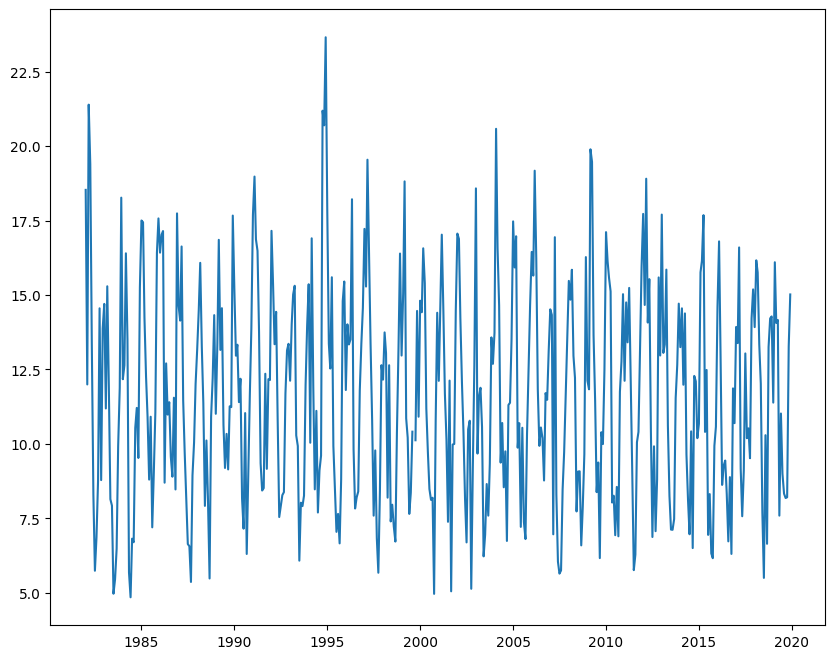

In [26]:
plt.figure(figsize=(10,8))
plt.plot(dates,sst_new[:,80,80]-273)
# plt.ylim(0,27)

In [8]:
#Locations
stations=np.array([556,557,560,561,562,564,565,566,568,569,570,571,573,574,576,579,580,581,582,583,584])
lon_s=-np.array([52.31,52.21,51.41,51.30,50.85,51.95,50.92,50.62,50.45,
              50.56,50.37,50.30,50.11,49.97,49.15,48.83,48.22,48.28,48.57,48.17,47.85])
lat_s=-np.array([33.75,33.79,33.23,33.27,33.45,32.19,32.83,33.00,33.10,
               32.29,32.48,32.53,30.99,31.10,29.83,28.63,29.29,29.22,28.03,28.15,28.24])

In [9]:
SST_stationDF=[]
for idx in range(len(lon_s)):
    indx_lon=np.argwhere(lon.data<=lon_s[idx]).T[0][-1]
    indx_lat=np.argwhere(lon.data<=lat_s[idx]).T[0][-1]

    # sst_station_sample=sst_new[:,indx_lat,indx_lon]
    SST_stationDF.append(sst_new[:,indx_lat,indx_lon].data-273.15)

In [10]:
SST_stationDF=pd.DataFrame(SST_stationDF,index=stations,columns=dates)

In [11]:
pwd

'/homes/metogra/iufarias/Alkenone_SST'

In [12]:
# SST_stationDF.to_csv('/homes/metogra/iufarias/Alkenone_SST/monthly_climatology_1982-2019_SST_PATHFINDER_AVHRR_crude_mean.csv')

In [20]:
monthly_mean=sst_new.groupby('time.month').mean()

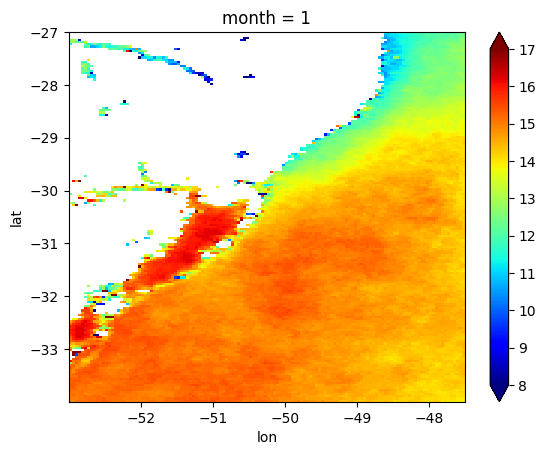

In [28]:
(monthly_mean[0]-273.15).plot(vmin=8,vmax=17,cmap='jet')

In [15]:
SST_stationDF

,1982-01-01,1982-02-01,1982-03-01,1982-04-01,1982-05-01,1982-06-01,1982-07-01,1982-08-01,1982-09-01,1982-10-01,...,2019-03-01,2019-04-01,2019-05-01,2019-06-01,2019-07-01,2019-08-01,2019-09-01,2019-10-01,2019-11-01,2019-12-01
556,15.575704,14.315901,19.591105,18.063069,14.230445,6.015920,5.239610,6.576326,7.360829,11.734820,...,16.668656,13.930734,10.973660,11.022957,6.058211,6.691028,7.995177,6.469991,11.952685,11.714994
557,17.043092,12.278511,18.695513,16.573923,14.467722,5.942957,5.419996,6.791994,7.666659,12.057410,...,15.690639,12.496995,10.192573,9.854133,5.994185,6.109028,8.114280,5.725476,12.403327,12.442574
560,16.344475,12.350363,21.021373,16.199278,14.628176,7.620733,5.913923,5.607659,6.068327,10.780316,...,15.790315,12.271660,10.065801,6.727927,4.987412,7.601929,8.763206,4.684512,11.283327,13.829992
561,15.332408,14.531915,20.632061,16.672135,12.825447,7.144067,7.057851,5.416325,6.395593,11.200994,...,16.495800,13.442993,10.964832,5.674477,6.065156,7.676444,8.844478,6.033218,12.170328,13.777736
562,17.674820,12.602584,20.136543,16.683565,13.601810,7.288880,5.432138,6.256327,6.707076,12.896325,...,15.343541,12.623325,10.322575,7.808961,6.167411,7.155476,9.502061,6.305480,11.986661,15.713220
564,16.136202,11.306778,19.258270,16.398920,14.600904,7.026662,5.050708,6.404326,7.285827,11.022658,...,14.936767,13.160661,9.525154,8.354822,7.040960,6.352571,8.360350,6.305477,12.048614,12.984187
565,16.952060,14.188882,19.527233,16.549993,13.997267,5.931845,5.904823,5.632327,6.499158,12.261929,...,15.114186,13.833659,11.291931,6.829303,6.521606,7.184508,9.273788,6.591929,12.587327,15.335798
566,19.432061,13.262216,20.833438,17.792954,13.991810,7.325918,6.738206,5.925995,6.139193,13.410325,...,16.779669,14.130992,11.093542,7.621371,7.239669,7.990641,9.189647,5.825478,12.036995,15.804186
568,18.875164,12.486289,20.834821,17.576061,13.191356,6.728510,5.589992,6.695326,7.201658,14.524660,...,16.392573,14.339991,10.827090,9.111375,7.749671,9.766443,9.818269,5.430961,12.647661,16.563539
569,18.838615,12.126661,20.912750,17.854994,13.464994,7.135179,6.370349,6.308994,6.678326,14.174994,...,15.609995,14.226658,11.375475,9.154128,8.684832,9.273864,9.104130,5.377091,12.798659,16.658701


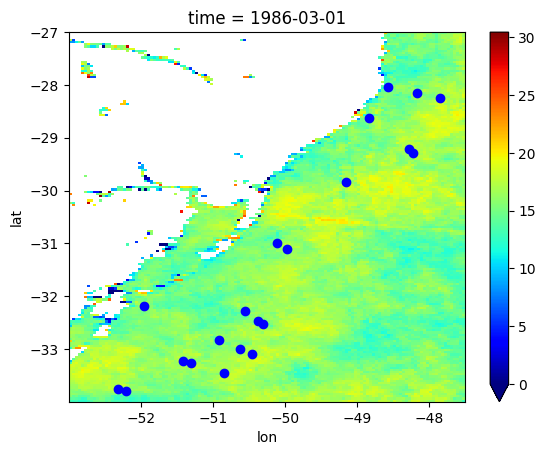

In [83]:
(SST_total[50]-273).plot(vmin=0,cmap='jet')
plt.scatter(lon_s,lat_s,c='blue')